In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve



In [9]:
train_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")
test_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv")

In [10]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
#dropping unwanted column
train_df = train_df.drop("ID", axis=1)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


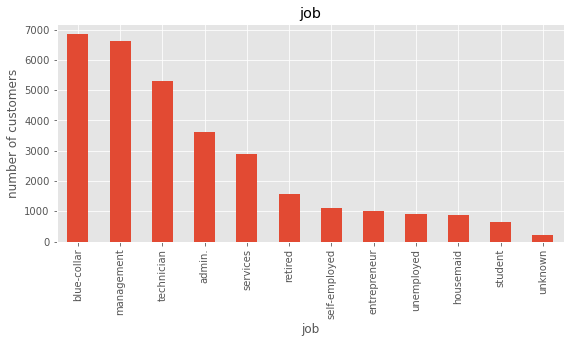

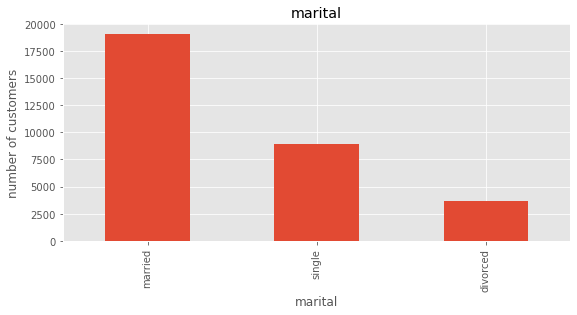

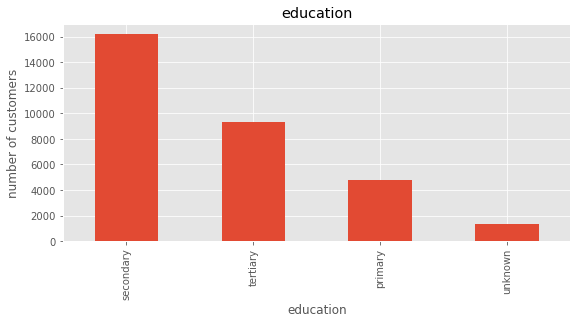

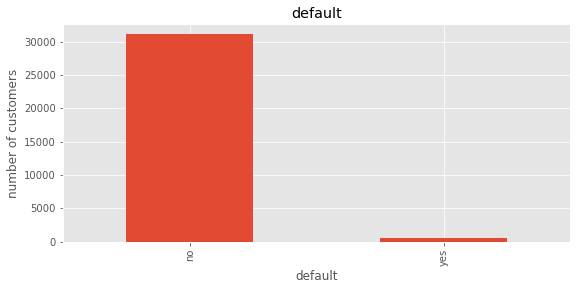

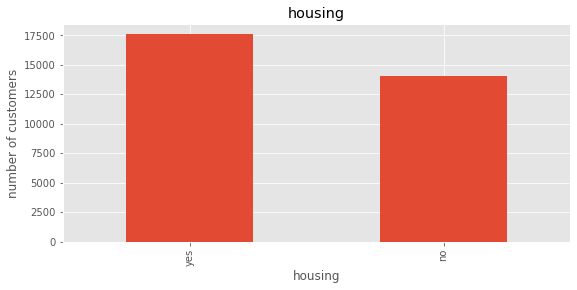

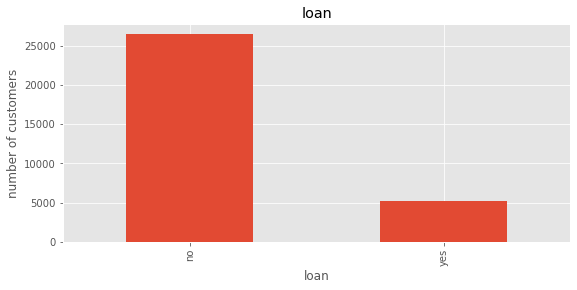

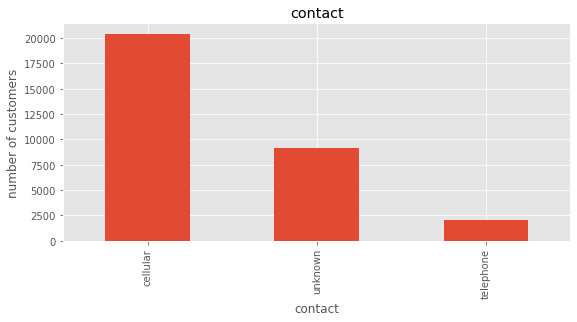

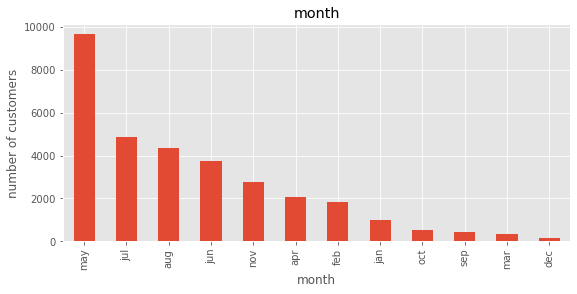

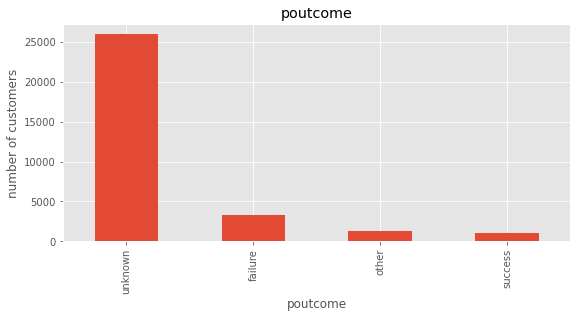

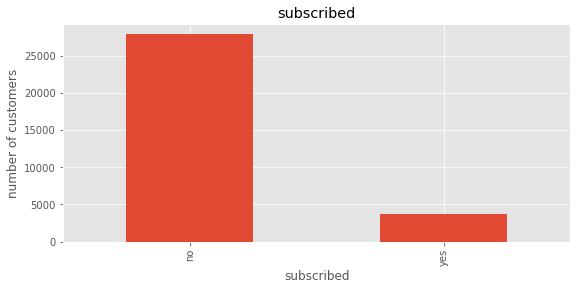

In [16]:
# indentifying the categorical variables
cat_var= train_df.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    train_df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)


In [17]:
# check categorical class
for i in cat_var:
    print(i, ":", train_df[i].unique())

job : ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital : ['married' 'divorced' 'single']
education : ['unknown' 'secondary' 'tertiary' 'primary']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular' 'unknown']
month : ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome : ['unknown' 'success' 'failure' 'other']
subscribed : ['no' 'yes']


In [18]:
# indentifying the numerical variables
num_var= train_df.select_dtypes(include=np.number)
num_var.head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    train_df[feature]= le.fit_transform(train_df[feature])

In [22]:
# label encoded dataset
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [39]:
train_df.shape

(31647, 17)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

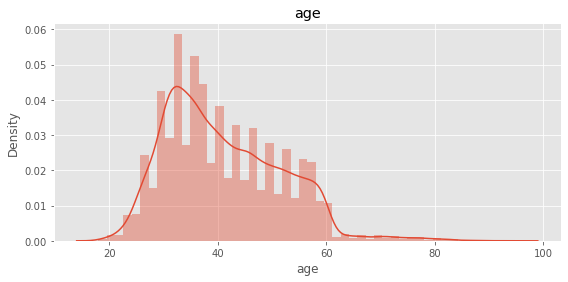

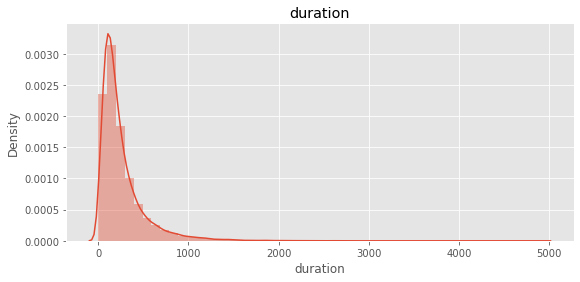

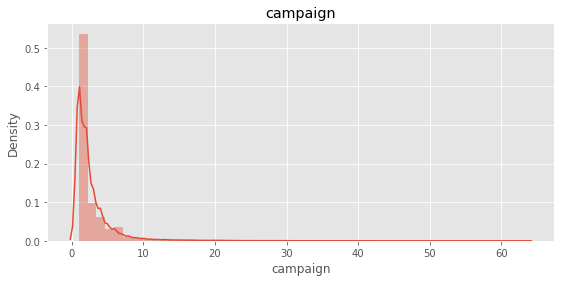

In [23]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(train_df[column], kde=True)
    plt.title(column)

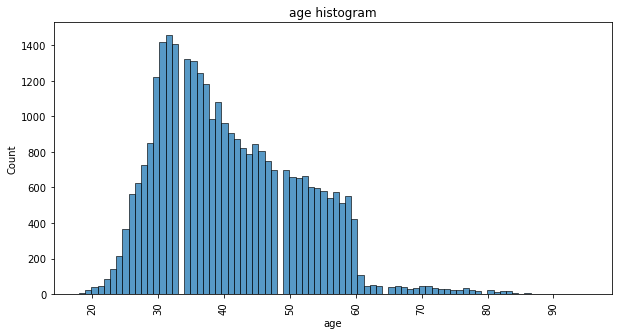

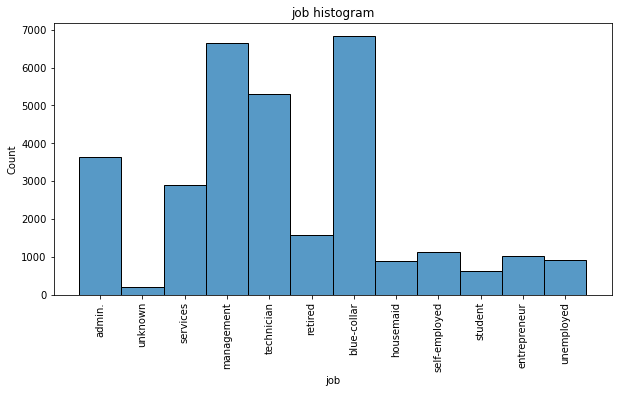

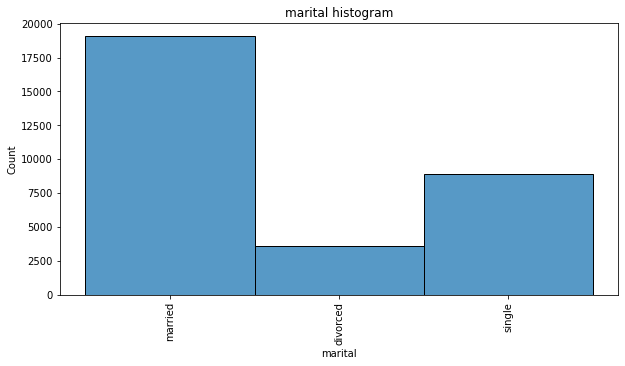

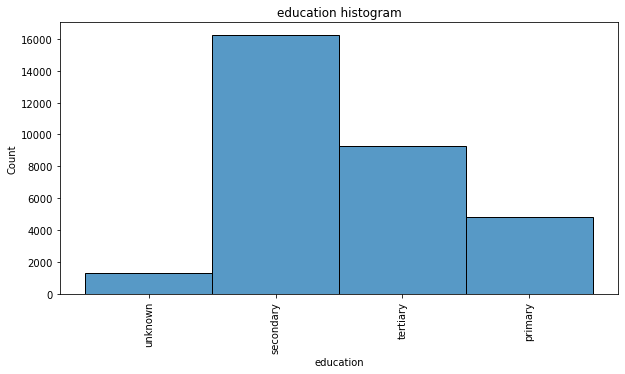

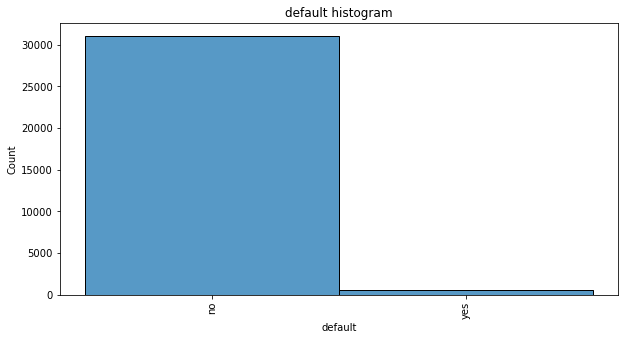

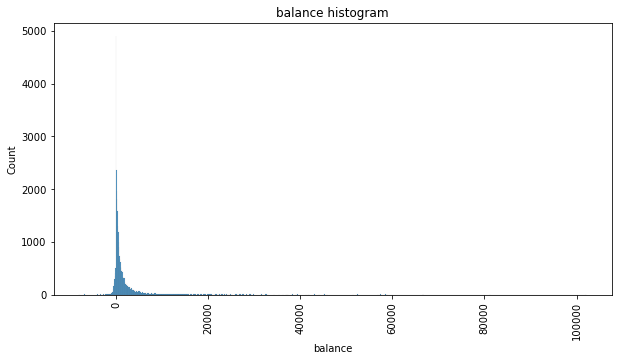

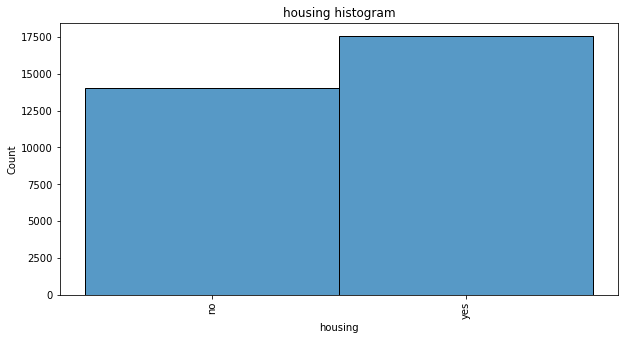

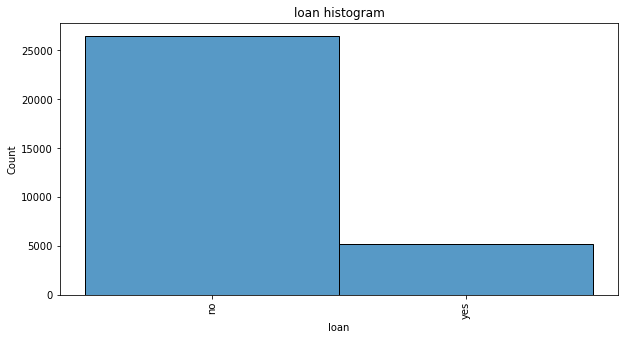

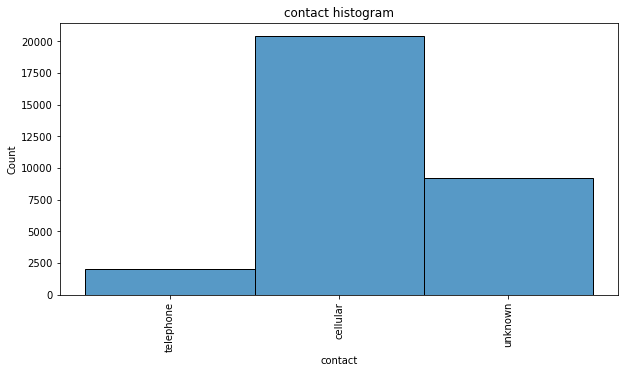

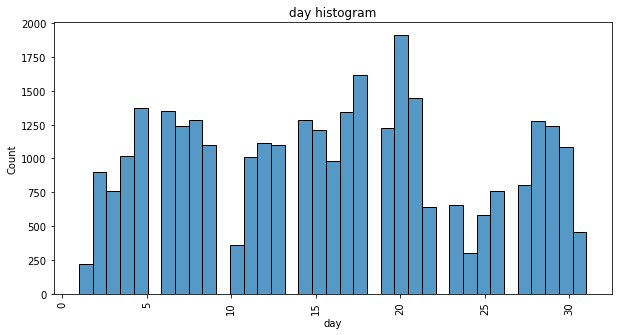

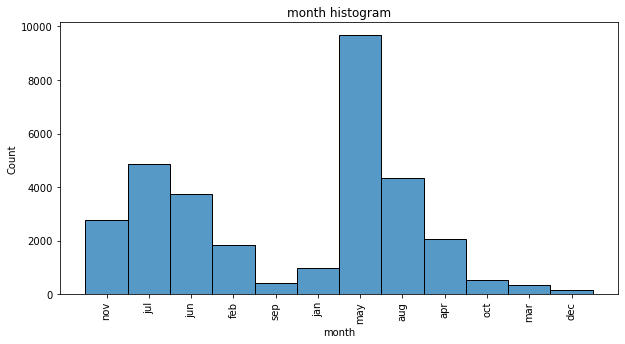

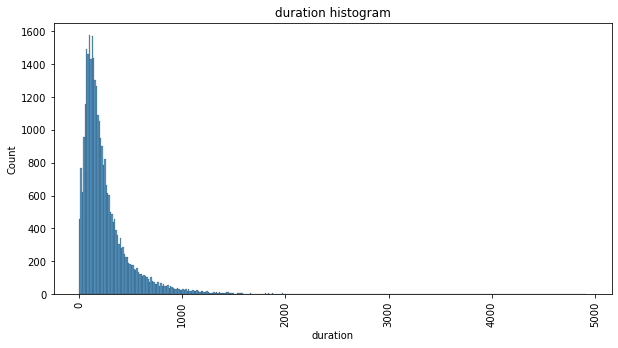

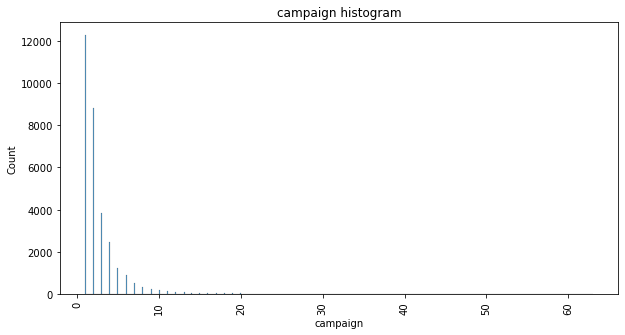

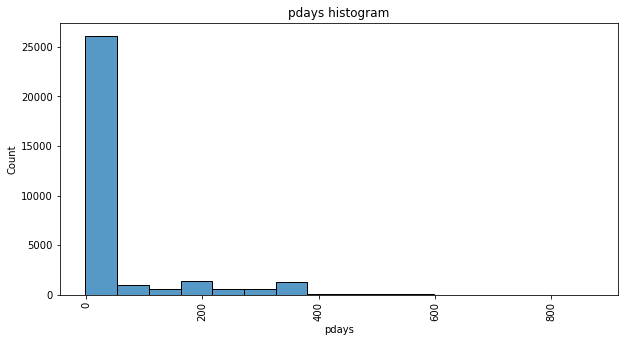

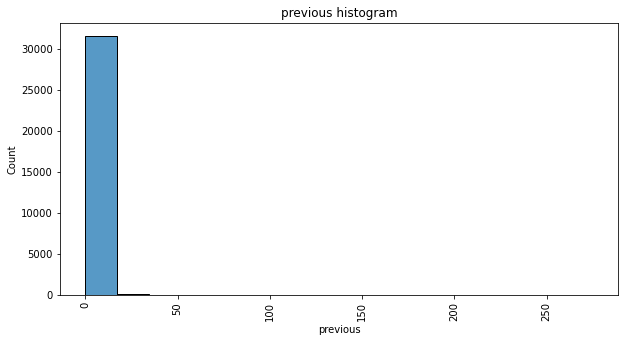

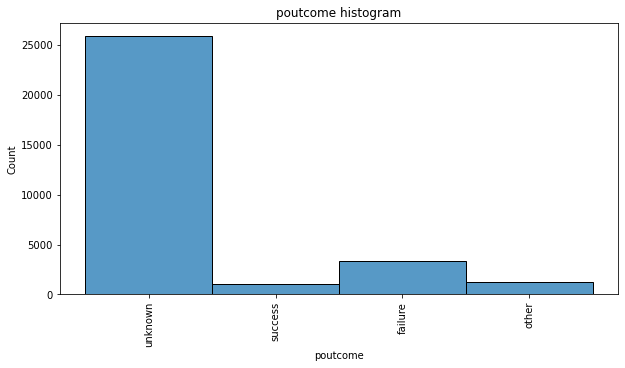

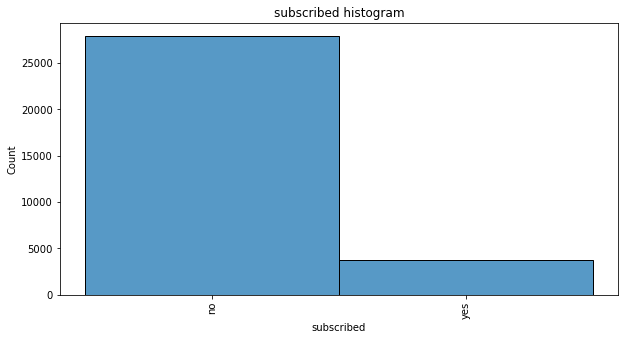

In [14]:
for col in train_df.columns:
    fig, ax= plt.subplots(figsize=(10,5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=train_df, x=col, ax=ax)
    plt.show()

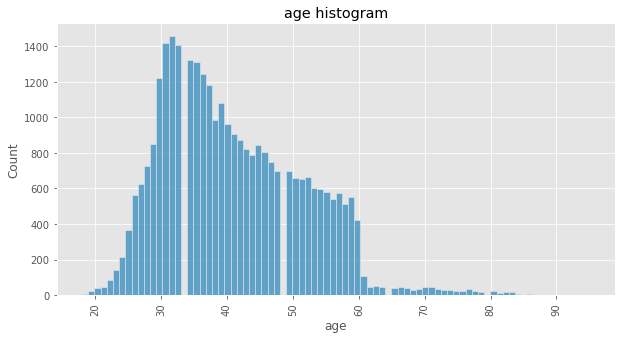

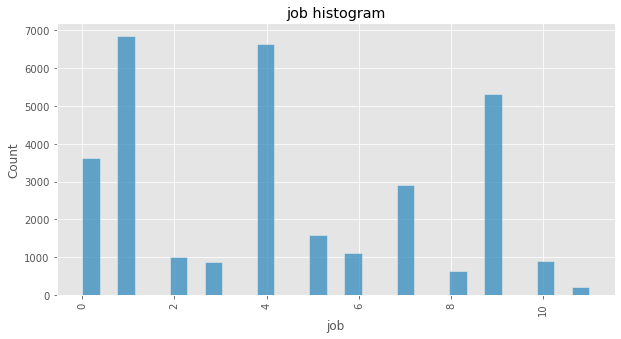

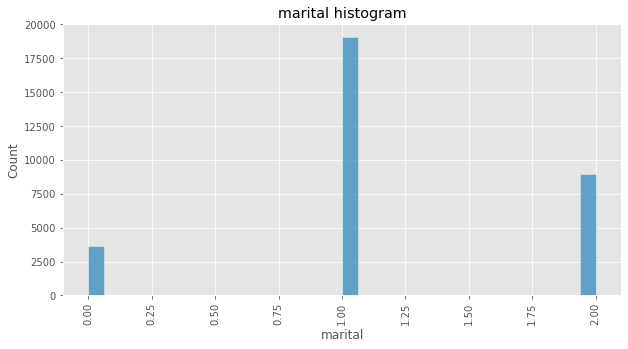

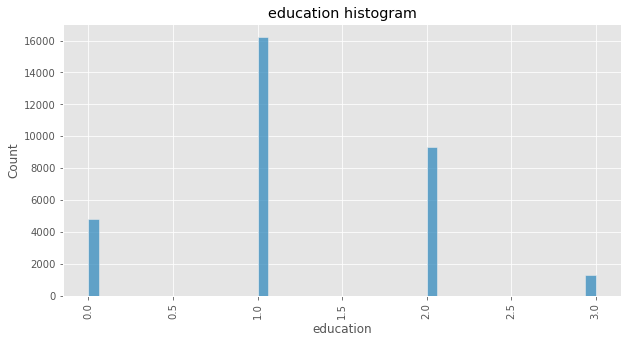

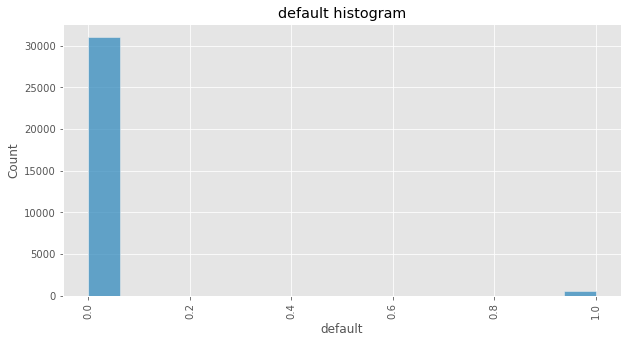

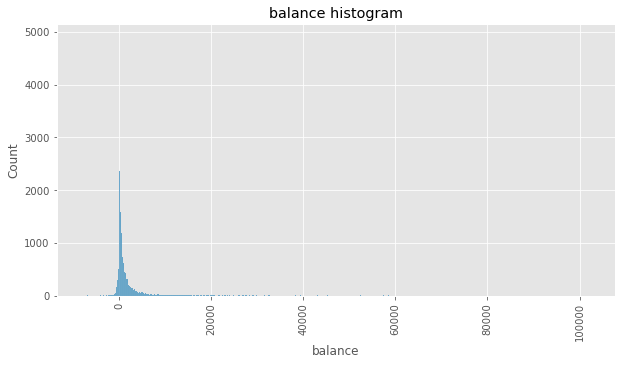

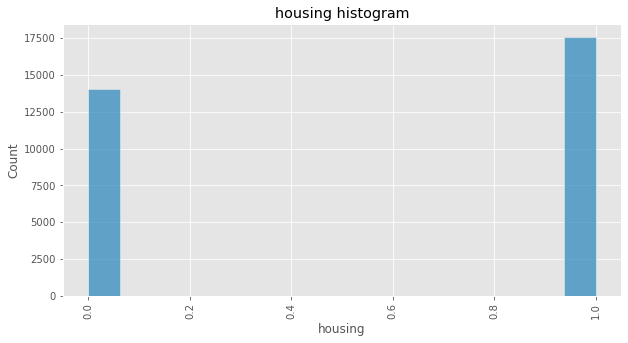

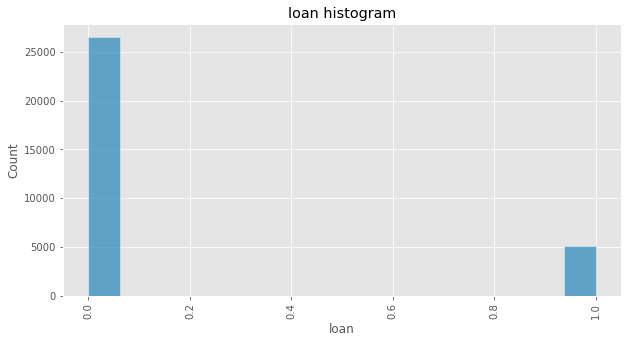

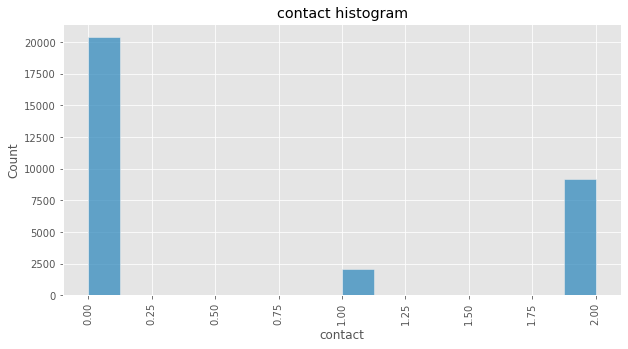

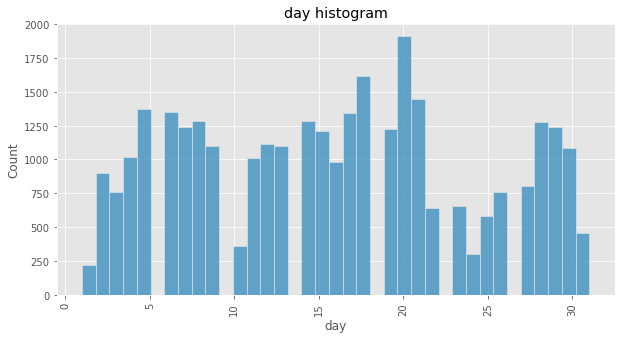

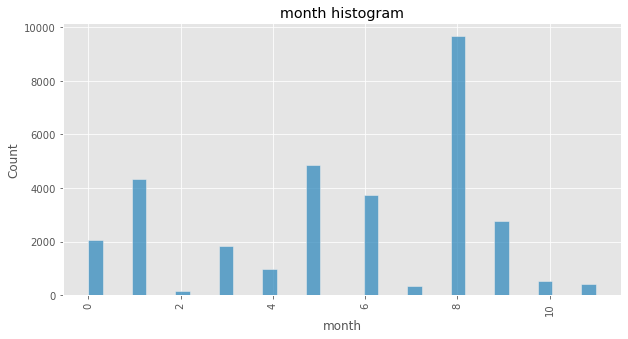

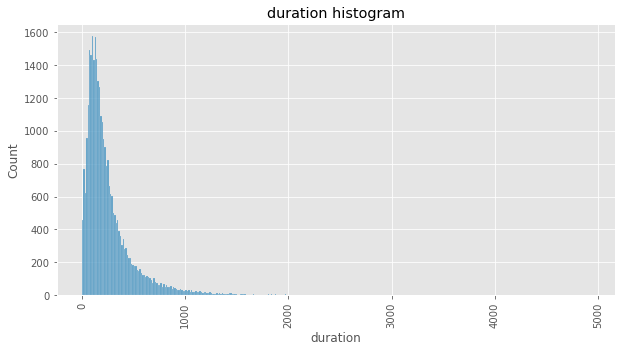

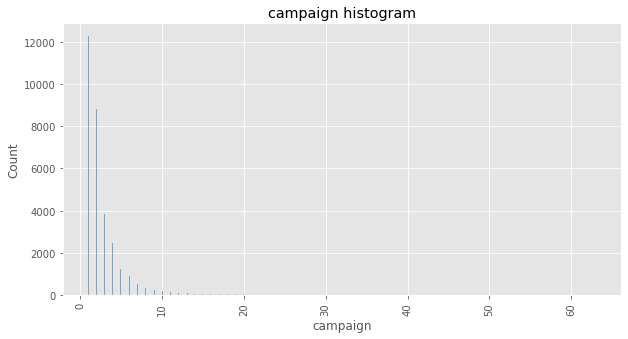

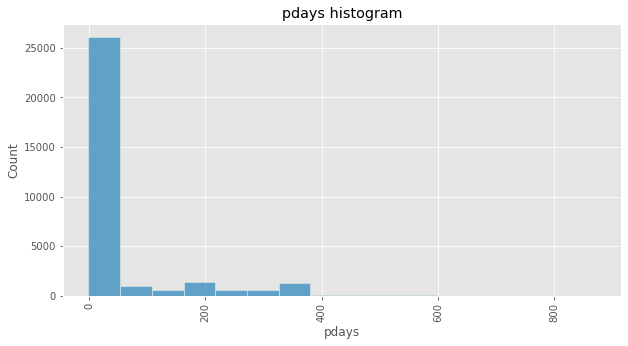

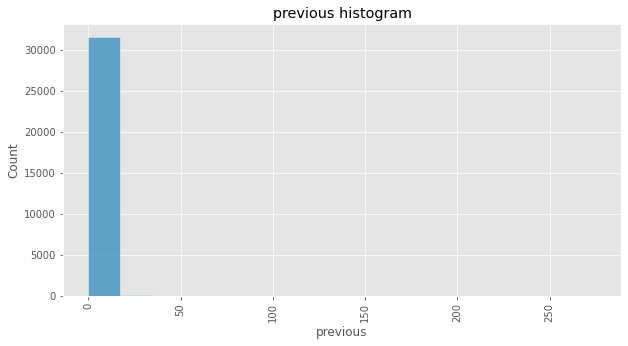

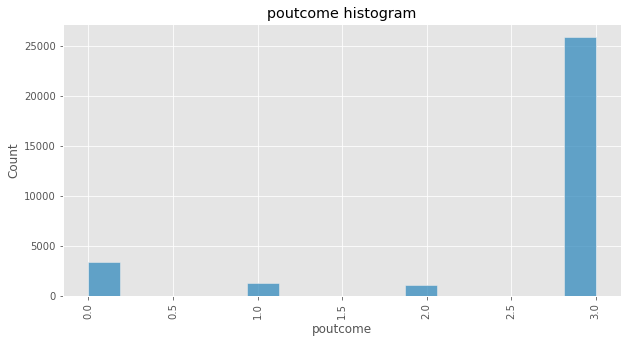

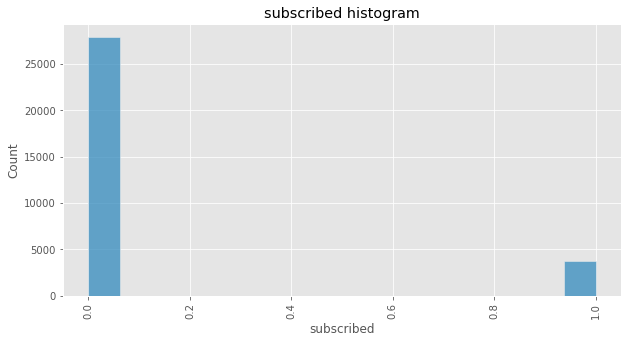

In [24]:
for col in train_df.columns:
    fig, ax= plt.subplots(figsize=(10,5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=train_df, x=col, ax=ax)
    plt.show()

In [26]:
from scipy.stats import zscore

In [27]:
z=np.abs(zscore(train_df))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [28]:
threshold=3
print(np.where(z>3))


(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))


In [29]:
new_train=train_df[(z<3).all(axis=1)]
new_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [33]:
new_train.isnull

<bound method DataFrame.isnull of        age  job  marital  education  default  balance  housing  loan  contact  \
0       56    0        1          3        0     1933        0     0        1   
1       31   11        1          1        0        3        0     0        0   
2       27    7        1          1        0      891        1     0        0   
3       57    4        0          2        0     3287        0     0        0   
4       31    9        1          1        0      119        1     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
31640   43    4        2          1        0     2968        0     0        2   
31641   37    9        2          2        0     1309        0     0        2   
31642   29    4        2          2        0        0        1     0        0   
31643   53    4        0          2        0      380        0     1        0   
31644   32    4        2          2        0      312        0     0       

In [37]:
new_train.shape


(27584, 17)

In [34]:
new_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [35]:
new_train.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

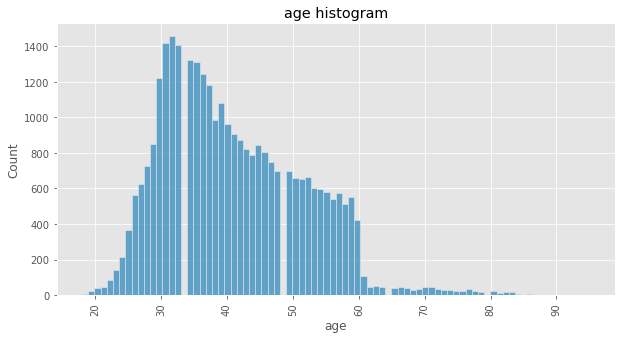

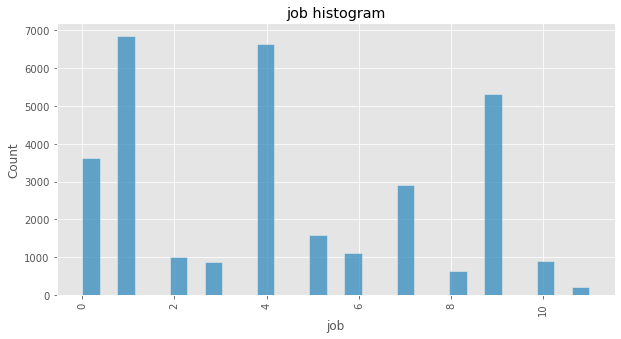

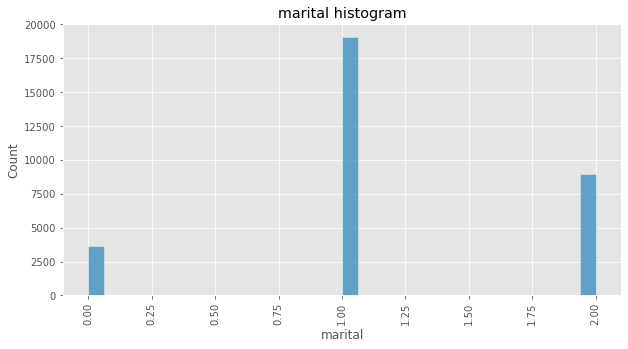

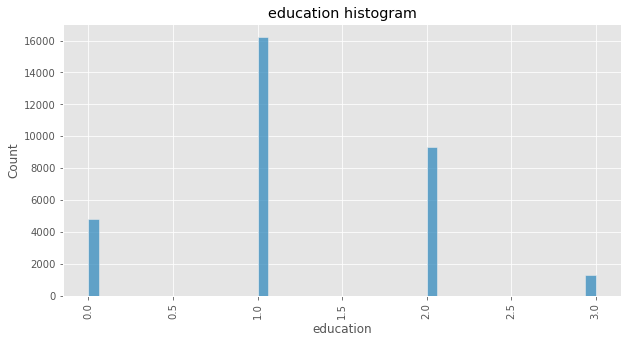

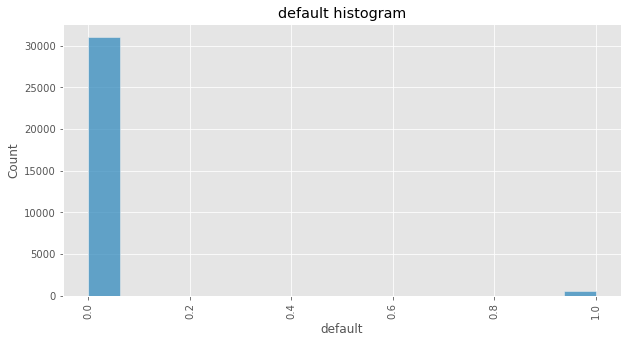

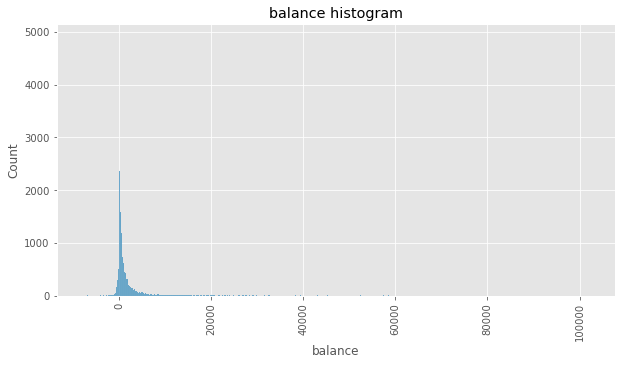

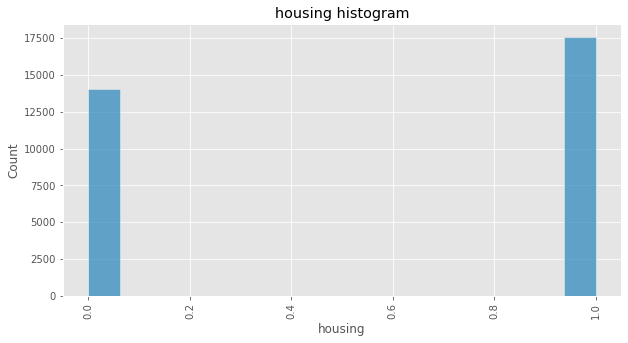

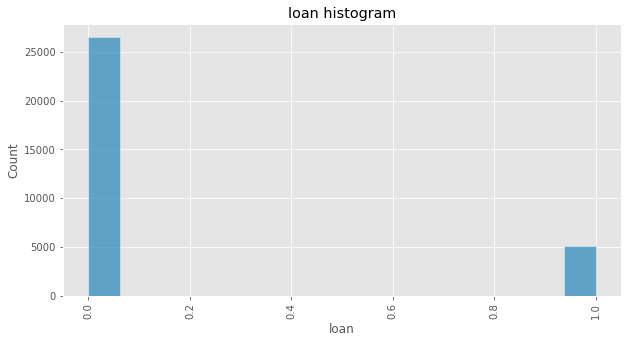

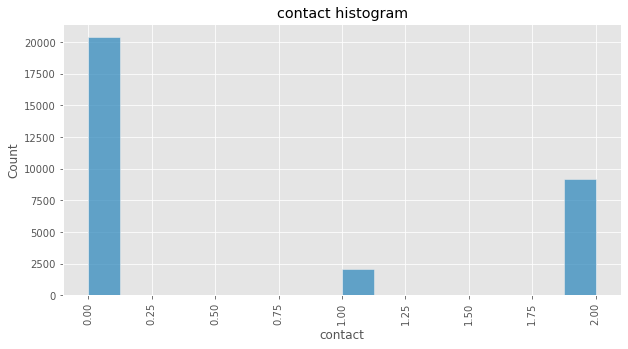

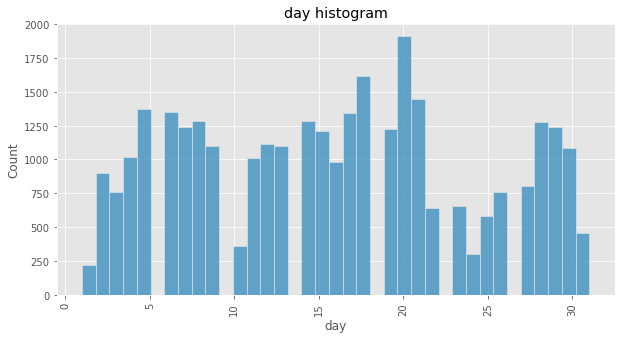

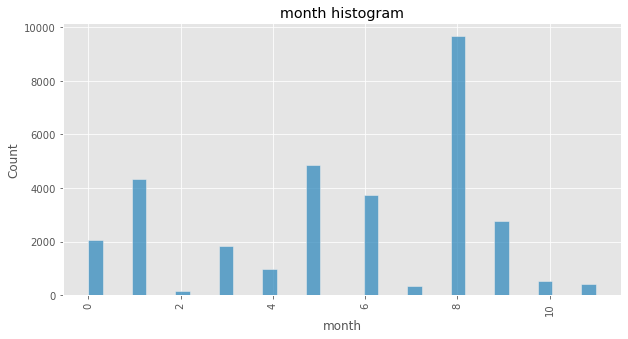

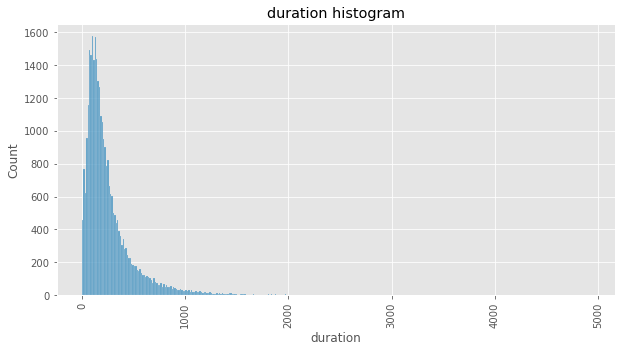

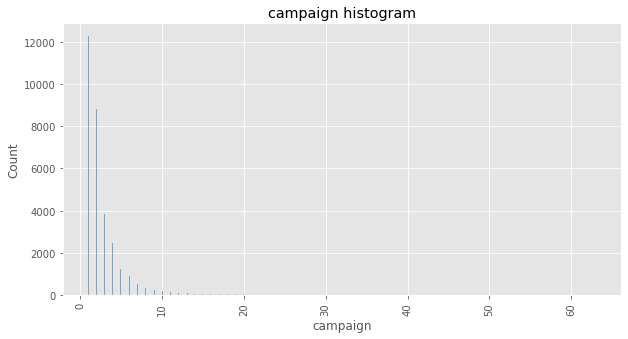

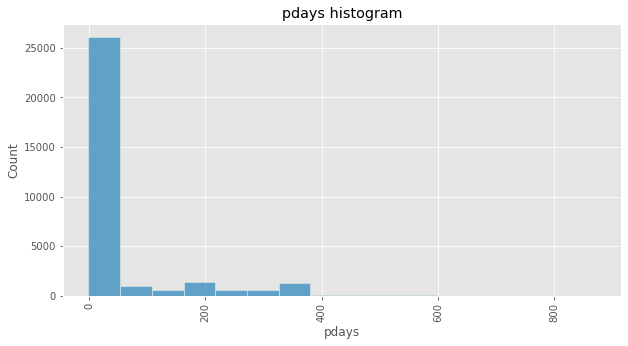

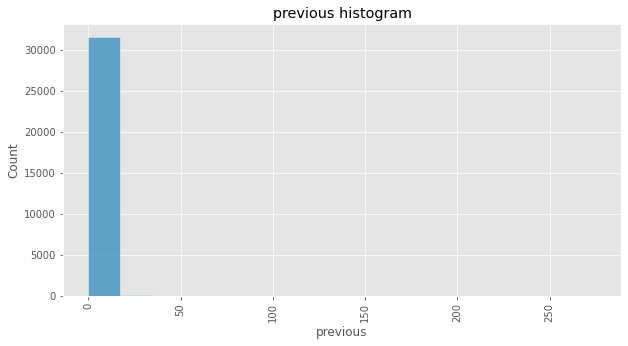

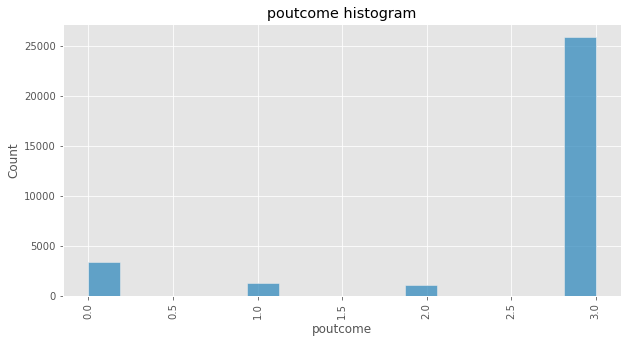

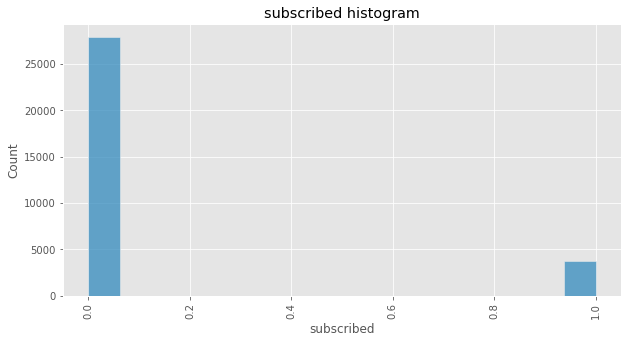

In [40]:
for col in new_train.columns:
    fig, ax= plt.subplots(figsize=(10,5))
    ax.tick_params(axis='x', rotation=90)
    plt.title(f'{col} histogram')
    sns.histplot(data=train_df, x=col, ax=ax)
    plt.show()

In [41]:
new_traincorr=new_train.corr()

In [42]:
new_traincorr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.030442,-0.411279,-0.101482,NaN,0.093209,-0.155100,0.005722,0.031171,-0.010067,-0.041290,-0.026249,0.035203,-0.010056,0.007490,0.000650,-0.006545
job,-0.030442,1.000000,0.068169,0.171837,NaN,0.023775,-0.124102,-0.037678,-0.084352,0.021324,-0.087652,-0.001964,0.004321,0.002898,0.013223,-0.012342,0.037552
marital,-0.411279,0.068169,1.000000,0.112713,NaN,0.011066,-0.027720,-0.045605,-0.042390,-0.008776,-0.002910,0.015562,-0.022340,0.014704,0.019024,-0.015937,0.056722
education,-0.101482,0.171837,0.112713,1.000000,NaN,0.052312,-0.098381,-0.047816,-0.122955,0.016973,-0.057185,0.001121,-0.007422,0.026627,0.043582,-0.041355,0.075855
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.093209,0.023775,0.011066,0.052312,NaN,1.000000,-0.057183,-0.094902,-0.037444,0.009251,0.031738,0.032218,-0.014114,0.039717,0.050004,-0.056917,0.070139
housing,-0.155100,-0.124102,-0.027720,-0.098381,NaN,-0.057183,1.000000,0.037213,0.214919,-0.013201,0.272980,0.011401,-0.040230,0.072516,0.007770,-0.049449,-0.149084
loan,0.005722,-0.037678,-0.045605,-0.047816,NaN,-0.094902,0.037213,1.000000,-0.011361,0.011915,0.027286,-0.010625,-0.002137,-0.006355,-0.015061,0.000010,-0.075136
contact,0.031171,-0.084352,-0.042390,-0.122955,NaN,-0.037444,0.214919,-0.011361,1.000000,-0.027797,0.392408,-0.023682,0.003623,-0.240344,-0.215593,0.249448,-0.159186
day,-0.010067,0.021324,-0.008776,0.016973,NaN,0.009251,-0.013201,0.011915,-0.027797,1.000000,0.017840,-0.026854,0.131437,-0.056260,-0.049713,0.045900,-0.029537


<AxesSubplot:>

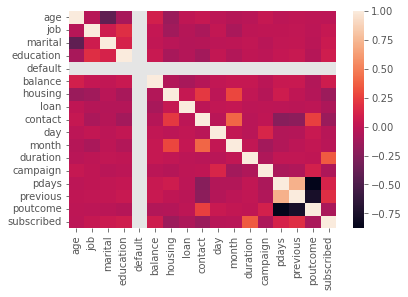

In [43]:
sns.heatmap(new_traincorr)

<AxesSubplot:>

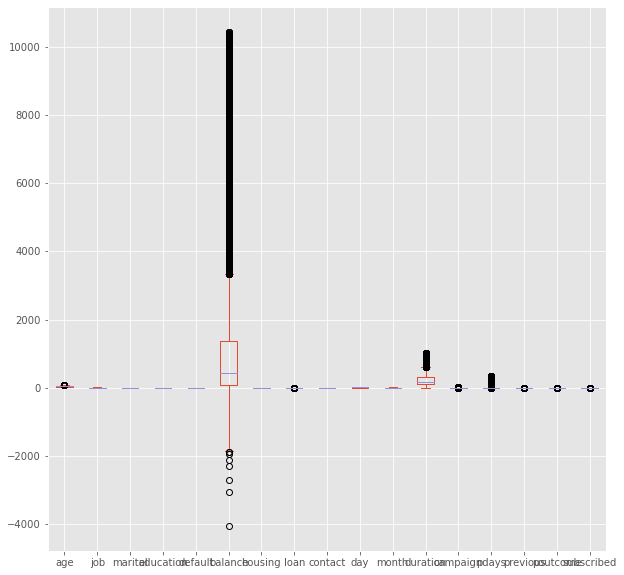

In [48]:
new_train.plot(kind='box',layout=(9*8),figsize=(10,10))

In [53]:
train_y=new_train["subscribed"]

In [55]:
tain_x=new_train.drop(columns=['subscribed'])

In [58]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()

In [65]:
x_scaled=scaler.fit_transform(new_train)

In [66]:
x_scaled

array([[ 1.51966919, -1.32228288, -0.27903433, ..., -0.33346453,
         0.38059074, -0.33758695],
       [-0.9575818 ,  2.02176653, -0.27903433, ..., -0.33346453,
         0.38059074, -0.33758695],
       [-1.35394196,  0.80574856, -0.27903433, ..., -0.33346453,
         0.38059074, -0.33758695],
       ...,
       [-1.15576188, -0.10626491,  1.3744314 , ..., -0.33346453,
         0.38059074, -0.33758695],
       [ 1.22239907, -0.10626491, -1.93250006, ..., -0.33346453,
         0.38059074,  2.96219985],
       [-0.85849176, -0.10626491,  1.3744314 , ..., -0.33346453,
         0.38059074, -0.33758695]])

In [71]:
train_y=new_train["subscribed"]

In [75]:
train_x=new_train.drop(columns=['subscribed'])

In [95]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [97]:
test_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [100]:
cat_var=test_df[['job','marital','education','default','housing','loan','contact','month','poutcome']]

In [101]:
for i in cat_var:
    print(i, ":", test_df[i].unique())

job : [ 7  5  6  1  4  9  0 10  3  2  8 11]
marital : [1 0 2]
education : [1 0 2 3]
default : [0 1]
housing : [1 0]
loan : [0 1]
contact : [0 1 2]
month : [ 8  5  6  7  3 11  1  2  4  0  9 10]
poutcome : [3 0 1 2]


In [102]:
for col in cat_var:
    test_df[col] = le.fit_transform(test_df[col])

In [103]:
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

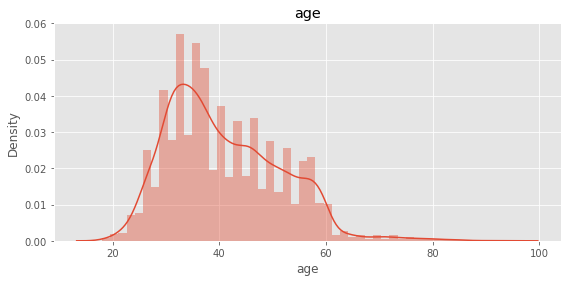

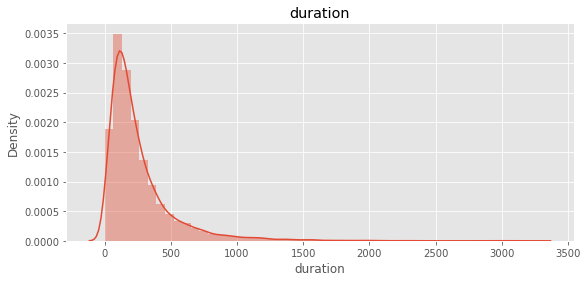

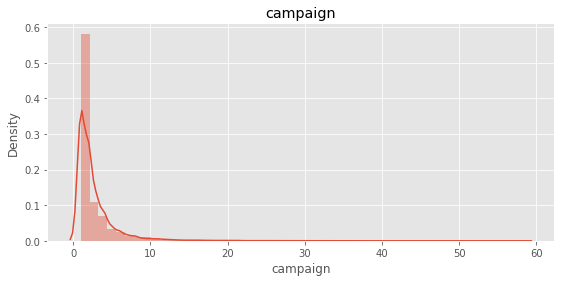

In [104]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "duration", "campaign"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(test_df[column], kde=True)
    plt.title(column)

In [105]:
z=np.abs(zscore(test_df))
z

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.211134,0.838114,0.807551,0.276592,0.301053,0.131336,0.402389,0.893033,0.429564,0.704444,0.089124,0.829938,0.921849,1.058702,0.418199,0.297500,0.452163
1,1.362131,3.499987,0.196760,1.914173,1.642982,0.131336,0.463375,1.119779,0.429564,0.413763,1.778340,0.165753,0.439963,0.574850,0.418199,0.297500,0.452163
2,1.461882,0.932421,0.502156,1.360988,1.040875,0.131336,0.393955,0.893033,0.429564,1.531969,0.031534,0.829938,1.616074,0.574850,0.418199,0.297500,0.452163
3,1.132710,1.519549,0.807551,1.360988,1.642982,0.131336,0.784508,0.893033,0.429564,0.413763,0.330440,0.829938,0.747754,0.248140,0.418199,0.297500,0.452163
4,0.783238,0.387871,1.024823,1.914173,0.301053,0.131336,0.669352,1.119779,2.327941,1.531969,1.537023,0.165753,0.569789,0.574850,0.418199,0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.058563,0.177969,0.108636,0.276592,1.040875,0.131336,0.426069,1.119779,0.429564,0.704444,1.479434,1.493340,0.426644,0.405281,0.418199,0.297500,0.452163
13560,0.843576,1.236630,1.024823,0.276592,1.642982,0.131336,0.299239,0.893033,0.429564,1.531969,0.514168,0.166144,0.387957,0.574850,0.418199,0.297500,0.452163
13561,0.430055,0.555195,0.196760,0.276592,1.642982,0.131336,0.348218,0.893033,0.429564,0.704444,1.600092,0.497650,0.473070,0.574850,0.418199,0.297500,0.452163
13562,1.728467,1.121034,1.330219,1.360988,0.301053,0.131336,0.290155,1.119779,0.429564,0.704444,0.813073,1.161835,0.194517,0.248140,0.483926,1.203911,0.542830


In [106]:
threshold=3
print(np.where(z>3))


(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64), array([ 1, 14,  6, ..., 12, 13, 14], dtype=int64))


In [107]:
new_test=test_df[(z<3).all(axis=1)]
new_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
5,16013,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,35237,32,9,2,1,0,129,1,0,0,7,8,213,1,-1,0,3
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3


In [108]:
test_df.shape

(13564, 17)

In [109]:
new_test.shape

(11821, 17)

In [110]:
new_testcorr=new_test.corr()

In [111]:
new_testcorr

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,1.000000,-0.024330,0.069524,0.078373,0.099675,NaN,0.091152,-0.185564,-0.070663,-0.732702,-0.040475,-0.199233,0.031183,-0.096357,0.384771,0.383036,-0.393487
age,-0.024330,1.000000,-0.026578,-0.403382,-0.116760,NaN,0.098312,-0.171143,-0.004247,0.030179,-0.010573,-0.050207,-0.019110,0.038763,-0.017109,0.006222,0.004630
job,0.069524,-0.026578,1.000000,0.048031,0.153353,NaN,0.011694,-0.124176,-0.020899,-0.090118,0.020611,-0.097150,0.009497,0.020474,-0.010561,0.015924,0.004563
marital,0.078373,-0.403382,0.048031,1.000000,0.110196,NaN,-0.000786,-0.013167,-0.060554,-0.037293,0.003659,-0.016126,0.007188,-0.026490,0.011871,0.006206,-0.008212
education,0.099675,-0.116760,0.153353,0.110196,1.000000,NaN,0.044163,-0.084294,-0.057368,-0.115241,0.034085,-0.059920,-0.005025,0.011341,0.008835,0.031607,-0.027910
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.091152,0.098312,0.011694,-0.000786,0.044163,NaN,1.000000,-0.059964,-0.100665,-0.027838,0.017523,0.036661,0.032022,-0.020929,0.034094,0.063303,-0.062668
housing,-0.185564,-0.171143,-0.124176,-0.013167,-0.084294,NaN,-0.059964,1.000000,0.053812,0.191245,-0.021455,0.276324,0.010963,-0.041948,0.112079,0.034949,-0.087792
loan,-0.070663,-0.004247,-0.020899,-0.060554,-0.057368,NaN,-0.100665,0.053812,1.000000,-0.017366,0.000289,0.022781,-0.015639,-0.003339,-0.013915,-0.020425,0.014148
contact,-0.732702,0.030179,-0.090118,-0.037293,-0.115241,NaN,-0.027838,0.191245,-0.017366,1.000000,-0.029902,0.385142,-0.043720,-0.002341,-0.244055,-0.223938,0.255402


<AxesSubplot:>

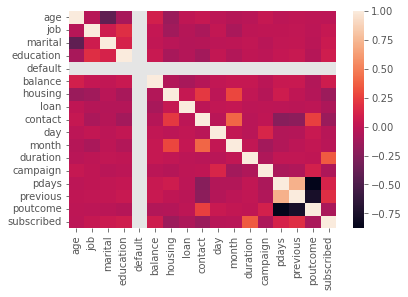

In [112]:
sns.heatmap(new_traincorr)

<AxesSubplot:>

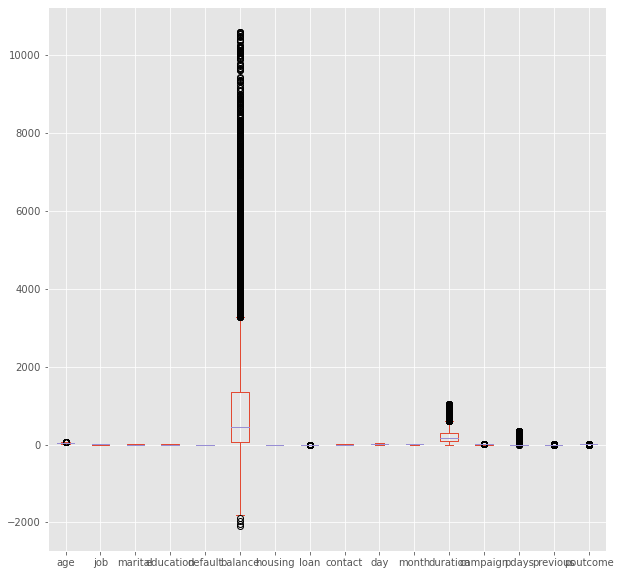

In [213]:
new_test.plot(kind='box',layout=(9*8),figsize=(10,10))

In [214]:
new_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3,
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3,
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3,
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3,
5,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3,


In [215]:
train_X = new_train.drop("subscribed", axis=1)
train_y = new_train["subscribed"]


In [216]:
test_X = new_test.drop("subscribed", axis=1)
test_y = new_test["subscribed"]

In [218]:
x_scaled=scaler.fit_transform(new_test)

ValueError: could not convert string to float: ''

In [ ]:
# adding  new column (Target)to test data 
new_test["subscribed"] = ""

In [224]:
lr=LogisticRegression()

In [225]:
lr.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
y_pred=lr.predict(train_x)

In [227]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [228]:
from sklearn.metrics import r2_score

In [229]:
accuracy_score(train_y,y_pred)


0.898455626450116

In [230]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [231]:
confusion_matrix(train_y,y_pred)

array([[24321,   441],
       [ 2360,   462]], dtype=int64)

In [232]:
classification_report(train_y,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.95     24762\n           1       0.51      0.16      0.25      2822\n\n    accuracy                           0.90     27584\n   macro avg       0.71      0.57      0.60     27584\nweighted avg       0.87      0.90      0.87     27584\n'

In [233]:
auc_score=roc_auc_score(train_y,lr.predict(train_x))

In [234]:
auc_score

0.5729520656780116

In [235]:
accuracy_score(train_y,y_pred)


0.898455626450116

In [236]:
#hence 90% accuracy

In [200]:
test_x = new_test.drop("subscribed", axis=1)
test_y = new_test["subscribed"]

In [201]:
new_test.shape

(11821, 17)

In [202]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11821 entries, 0 to 13562
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         11821 non-null  int64 
 1   job         11821 non-null  int64 
 2   marital     11821 non-null  int64 
 3   education   11821 non-null  int64 
 4   default     11821 non-null  int64 
 5   balance     11821 non-null  int64 
 6   housing     11821 non-null  int64 
 7   loan        11821 non-null  int64 
 8   contact     11821 non-null  int64 
 9   day         11821 non-null  int64 
 10  month       11821 non-null  int64 
 11  duration    11821 non-null  int64 
 12  campaign    11821 non-null  int64 
 13  pdays       11821 non-null  int64 
 14  previous    11821 non-null  int64 
 15  poutcome    11821 non-null  int64 
 16  subscribed  11821 non-null  object
dtypes: int64(16), object(1)
memory usage: 1.6+ MB


In [203]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27584 entries, 0 to 31644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         27584 non-null  int64
 1   job         27584 non-null  int32
 2   marital     27584 non-null  int32
 3   education   27584 non-null  int32
 4   default     27584 non-null  int32
 5   balance     27584 non-null  int64
 6   housing     27584 non-null  int32
 7   loan        27584 non-null  int32
 8   contact     27584 non-null  int32
 9   day         27584 non-null  int64
 10  month       27584 non-null  int32
 11  duration    27584 non-null  int64
 12  campaign    27584 non-null  int64
 13  pdays       27584 non-null  int64
 14  previous    27584 non-null  int64
 15  poutcome    27584 non-null  int32
 16  subscribed  27584 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.7 MB


In [241]:
from sklearn.tree import DecisionTreeRegressor

In [243]:
dtr=DecisionTreeRegressor()

In [244]:
dtr.fit(train_x,train_y)

DecisionTreeRegressor()

In [249]:
y_preddtr=dtr.predict(train_x)

In [250]:
y_preddtr

array([0., 0., 0., ..., 0., 1., 0.])

In [251]:
accuracy_score(train_y,y_pred)


1.0

In [252]:
confusion_matrix(train_y,y_pred)

array([[24762,     0],
       [    0,  2822]], dtype=int64)

In [253]:
classification_report(train_y,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     24762\n           1       1.00      1.00      1.00      2822\n\n    accuracy                           1.00     27584\n   macro avg       1.00      1.00      1.00     27584\nweighted avg       1.00      1.00      1.00     27584\n'

In [254]:
auc_score=roc_auc_score(train_y,lr.predict(train_x))

In [255]:
auc_score

0.5729520656780116

In [256]:
accuracy_score(train_y,y_pred)

1.0

In [ ]:
# Hence accuracy score with DTR (Decision Tree Regressor is 100%)

In [260]:
import joblib

In [261]:
joblib.dump(dtr, 'model.joblib')

['model.joblib']

In [262]:
dtr = joblib.load('model.joblib')


In [258]:
predictions = dtr.predict(test_x)

In [259]:
print (predictions)

[0. 1. 0. ... 0. 0. 1.]
